In [1]:
using Distributions, Random, Statistics, Plots;

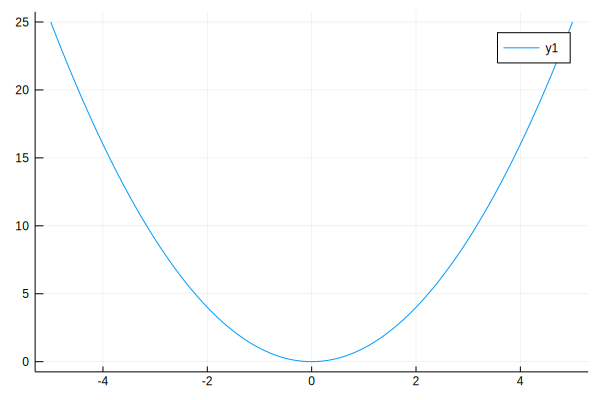

In [3]:
x = -5:0.1:5
y = x.^2
plot(x,y)

In [4]:
zdist = Uniform(-1,1)

Uniform{Float64}(a=-1.0, b=1.0)

In [5]:
f(t,z) = z^2*t^2 + 3*z*(1/t);

In [6]:
g(t,z) = (1/3)*t^2 + (3/t)*z

g (generic function with 1 method)

In [53]:
N = 100
tval = 1:0.1:10
# tval = 0.5:0.1:1.5
fvals = zeros(length(tval),N)

for i=1:N
    zval = rand(zdist)
    fvals[:,i]=f.(tval, zval)
end

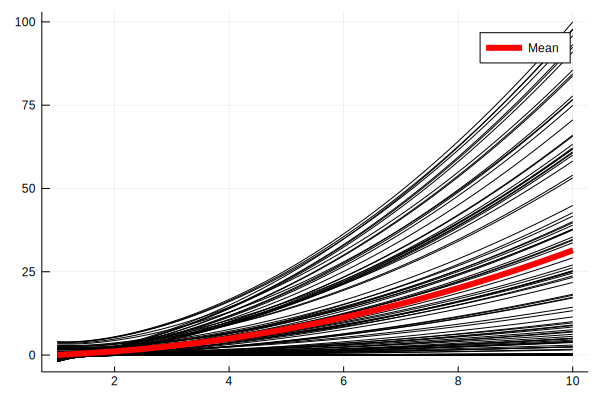

In [54]:
plot(tval, fvals,color=:black, label="" )
plot!(tval, mean(fvals,dims=2), color=:red, label="Mean", linewidth=6)

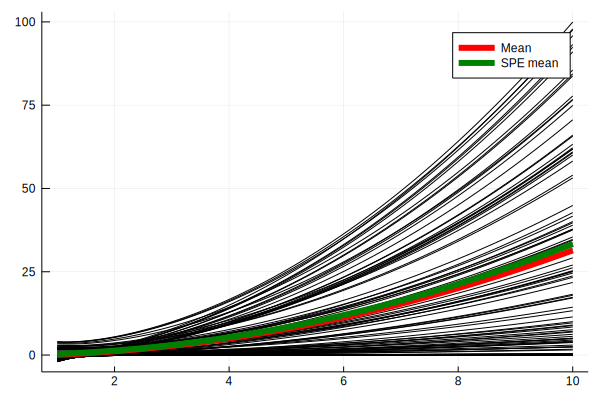

In [55]:
plot!(tval, g.(tval,0), color=:green, label="SPE mean", linewidth=6) #spectral polynomial expansion

In [56]:
gvals = zeros(length(tval), N)

for i=1:N
    zval = rand(zdist)
    gvals[:,i] = g.(tval,zval)
end

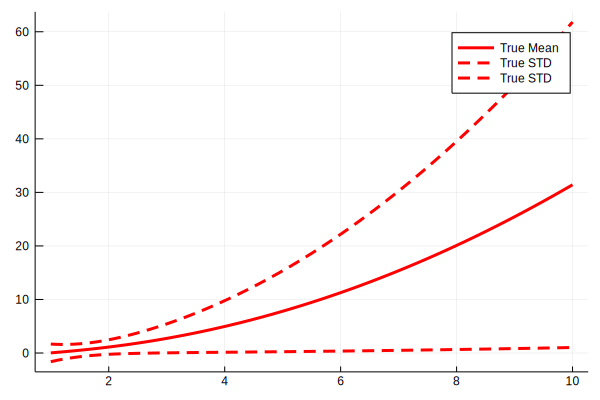

In [57]:
plot(tval, mean(fvals, dims=2), label="True Mean", linewidth=3, color=:red)
plot!(tval, mean(fvals, dims=2) +std(fvals,dims=2), label="True STD", linewidth=3, color=:red, linestyle=:dash)
plot!(tval, mean(fvals, dims=2) - std(fvals, dims=2), label="True STD", linewidth=3, color=:red, linestyle=:dash)

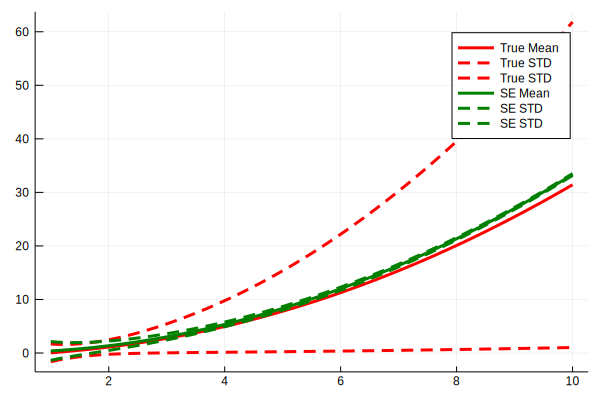

In [58]:
plot!(tval, mean(gvals, dims=2), label="SE Mean", linewidth=3, color=:green)
plot!(tval, mean(gvals, dims=2) + std(gvals,dims=2), label="SE STD", linewidth=3, color=:green, linestyle=:dash)
plot!(tval, mean(gvals, dims=2) - std(gvals, dims=2), label="SE STD", linewidth=3, color=:green, linestyle=:dash)